---
<img src="https://ead.ufes.br/pluginfile.php/188426/course/summary/logo_cluster.png" style="float: right;">


#  Laboratório 01 - Algoritmos de clusterização


Neste Laboratório, vamos avaliar e comparar a qualidade do agrupamento nos algoritmos de clusterização com alguns datasets diferentes.

**Objetivos**

1. Entender o funcionamento dos algoritmos de clusterização: KMeans, DBSCAN, e Hierárquico.
2. Aplicar os algoritmos a diferentes datasets.
3. Comparar o desempenho de cada algoritmo utilizando métricas quantitativas.

**Resultados esperados**

Ao final deste laboratório é esperado que saiba identificar qual algoritmo se adapta melhor a diferentes cenários de dados.

**Valor**: 15 pontos

Para este Laboratório, vamos definir funções que permitam executas os algoritmos abaixo com determinados datasets:

1. **KMeans**
2. **DBSCAN**
3. **Clusterização Hierárquica**


# Parte 1: Datasets sem rótulos sobre os dados

**Valor**: 5 pontos

Inicialmente, iremos carregar os datasets sintéticos. Em seguida, você deverá:

1. Implementar as funções que executam os algoritmos de clusterização da scikitlearn
1. Implementar uma avaliação de medida interna
1. Executar os algortmos.

Importante: Não altere os nomes das funções, pois elas serão utilizadas em outras partes do código.

## 1. Importando as bibliotecas necessárias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import make_blobs, make_moons

## 2. Carregando datasets sintéticos

1. `X_blobs, y_blobs`: Conjunto de dados de 2 dimensões ($x,y$) criados de forma sintética com amostras bem agrupadas com formato globulares.
1. `X_moon, y_moon`: Conjunto de dados de 2 dimensões ($x,y$) criados de forma sintética com amostras bem agrupadas com formato de meia lua.

In [2]:
# Dataset 1: Blobs (Esférico)
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Dataset 2: Moons (Lua Crescente)
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)

# definindo uma função para visualização dos dados.
def plot_scatter(X_axis, y_axis,title):

    if isinstance(X_axis, pd.DataFrame):
        X_axis = X_axis.values  # Convert to NumPy array
    plt.scatter(X_axis[:, 0], X_axis[:, 1], c=y_axis)
    plt.title(title)
    plt.show()

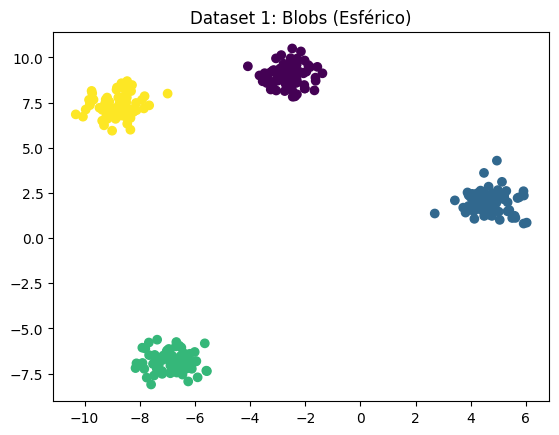

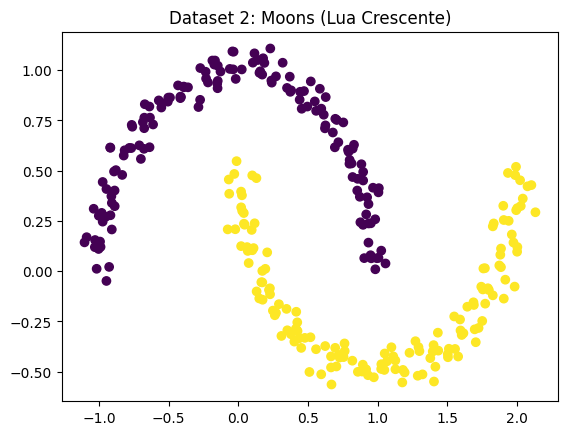

In [3]:
# Visualizando os datasets
plot_scatter(X_blobs, y_blobs, "Dataset 1: Blobs (Esférico)")
plot_scatter(X_moons, y_moons, "Dataset 2: Moons (Lua Crescente)")

## 3. Implemente as funções que para execução dos algoritmos de clusterização abaixo.

**Agora é com você!!!**

Utilizando a biblioteca `scikitlearn` desenvolva uma função que execute os algoritmos abaixo. O objetivo é ter uma função que facilite fazer chamadas de execução dos algoritmos para cada dataset.

> Revisite os Notebooks 01, 02, 03 e 04, se necessário.

### A.  **K-Means**

In [4]:
# Algoritmo KMeans
# X é o dataset que deverá ser agrupado e n_cluster o parâmetro k do K-means
#Retorna os labels dos clusters para cada ponto em X
def cluster_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    return kmeans.labels_

### B.  **DB-SCAN**

In [31]:
# Algoritmo DBSCAN
# X é o dataset que deverá ser agrupado e eps o raio e min_samples, o mínimo de elementos,
# como especificado pelo DB-SCAN
#Retorna os labels dos clusters para cada ponto em X
def cluster_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    return clusters #já é o proprio label

### C. Hierárquico Aglomerativo

In [32]:
# Algoritmo Hierárquico Aglomerativo
# X é o dataset que deverá ser agrupado e n_cluster é a quantidade de  clusters final desejada
#Retorna os labels dos clusters para cada ponto em X
def cluster_hierarchical(X, n_clusters):
    agglo_cluster = AgglomerativeClustering(n_clusters)
    agglo_cluster.fit(X)
    return agglo_cluster.labels_

## 4. Implemente uma função de avaliação de medidas internas

Neste exercício, vamos utilizar a `silhouete score` como métrica interna de avaliação dos agrupamentos gerados pelos algoritmos.

In [16]:
# Faça uma função que receba como parametros:
# O vetor de pontos original e o vetor de grupos pelo algoritmo
# retorne o silhouete_score da comparação dos vetores.
def avaliar_clustering(X, labels):
    return silhouette_score(X, labels)

## 5. Execute os algoritmos de clusterização

Este exercício considera que você não alterou os nomes das funções definidas nos exercícios 3 e 4.

Você deve setar os valores dos principais parametros para cada dataset.

### A. K-Means

Altere o valor de $k$ até descobrir o que maximiza o silhouete score.

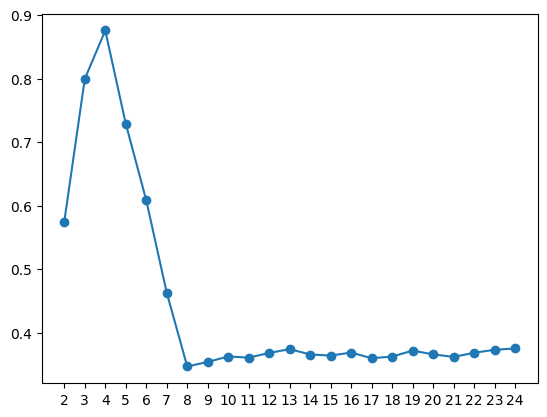

4
0.8756469540734731


In [27]:
## Criando um loop para descobrir o melhor valor de K
valores_k = []
silho_score = []
for i in range(2, 25):
    labels_kmeans = cluster_kmeans(X_blobs, i)
    valores_k.append(i)
    silho_score.append(avaliar_clustering(X_blobs, labels_kmeans))

fig, ax = plt.subplots()
ax.plot(valores_k, silho_score, marker='o')
ax.set_xticks(valores_k)
plt.show()

print(valores_k[np.argmax(silho_score)])
print(max(silho_score))

Olhando o gráfico anterior, temos que o melhor valor de K é 4

KMeans - Dataset 1 (Blobs)


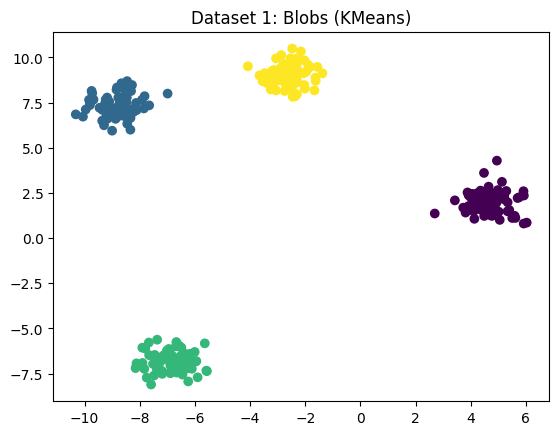

In [21]:
#@title Dataset  Blobs (KMeans)
k = 4 #@param
labels_kmeans_blob = cluster_kmeans(X_blobs, n_clusters=k)
print("KMeans - Dataset 1 (Blobs)")
avaliar_clustering(X_blobs, labels_kmeans_blob)

plot_scatter(X_blobs, labels_kmeans_blob, "Dataset 1: Blobs (KMeans)")

Vamos fazer a mesma coisa para o dataset de luas

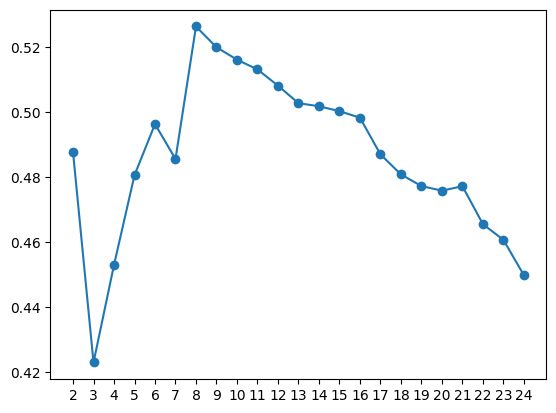

8
0.5263162020634521


In [28]:
## Criando um loop para descobrir o melhor valor de K
valores_k = []
silho_score = []
for i in range(2, 25):
    labels_kmeans = cluster_kmeans(X_moons, i)
    valores_k.append(i)
    silho_score.append(avaliar_clustering(X_moons, labels_kmeans))

fig, ax = plt.subplots()
ax.plot(valores_k, silho_score, marker='o')
ax.set_xticks(valores_k)
plt.show()

print(valores_k[np.argmax(silho_score)])
print(max(silho_score))

Ou seja, com base no código anterior, temos que o melhor valor de K é 8

KMeans - Dataset 1 (Blobs)


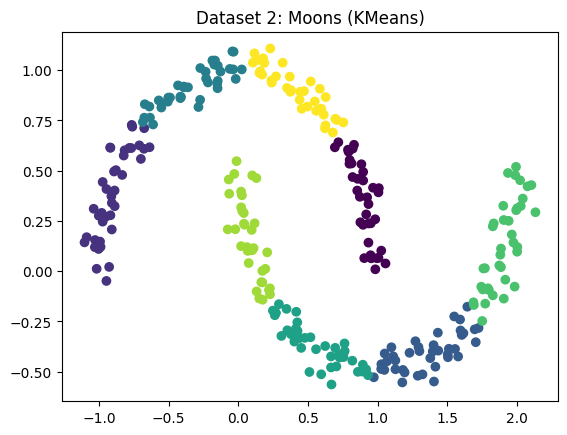

In [29]:
#@title Dataset Moon (KMeans)
k = 8 #@param
labels_kmeans_moons = cluster_kmeans(X_moons, n_clusters=k)
print("KMeans - Dataset 1 (Blobs)")
avaliar_clustering(X_moons, labels_kmeans_moons)

plot_scatter(X_moons, labels_kmeans_moons, "Dataset 2: Moons (KMeans)")

> **Pergunta**: Quais foram os melhores valores de $k$, isto é, que retornam o máximo `silhouete score` para cada dataset?

**Resposta**:

Blobs: 4

Moon: 8

### B. DB-SCAN

Altere os valores de $eps$ e $minPts$  até descobrir os que maximizam o silhouete score.

**Dica**: você pode alterar o código abaixo para iterar e testar os valores automaticamente.

**Observação**: Caso os valores dos parâmetro faça o algoritmo encontrar apenas UM cluster,  a função de cálculo do silhouete score irá retornar um erro de tamannho de array pois ela precisa de pelos dois clusters para identificar coesão e separação dos clusters.

Semelhante ao código para encontrar o melhor valor de K, vamos fazer o mesmo para o dbscan

In [115]:
def max_dbscan(X, eps_range, min_samples_range):
    best_score = -10
    best_eps = None
    best_samples = None

    # Vamos testar diferentes combinações, ou seja, loop dentro de lopp!
    for eps in eps_range:
        for min_sample in min_samples_range:
            labels_dbscan = cluster_dbscan(X, eps, min_sample)

            #Funcao "set" remove duplicatas
            if(len(set(labels_dbscan)) > 1):
                #Só podemos calcular o silhouete score se tiver mais de um cluster
                score = avaliar_clustering(X, labels_dbscan)

                if(score > best_score):
                    best_score = score
                    best_eps = eps
                    best_samples = min_sample
    
    return best_score, best_eps, best_samples

#Vamos testar o eps de 0.1, até 5.0, de 0.1 em 0.1
eps_range = np.arange(0.1, 5.0, 0.1)

#Vamos testar a quantidade de samples de 2 até 10
min_samples_range = range(2, 10)

#score, eps, samples
print(max_dbscan(X_blobs, eps_range, min_samples_range))

(np.float64(0.8756469540734731), np.float64(1.1), 2)


DBSCAN - Dataset 1 (Blobs)


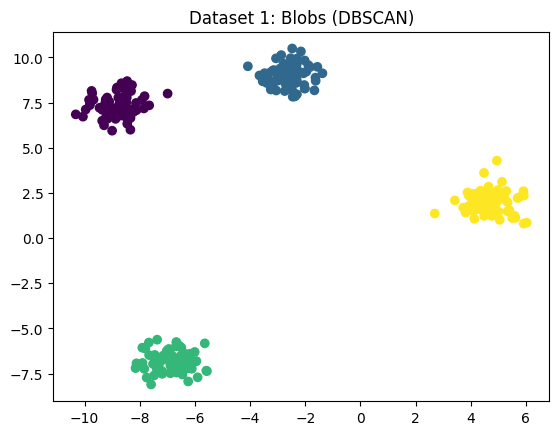

In [116]:
#@title Dataset Blobs (DBSCAN)
eps = 1.1 #@param
minPts = 2 #@param
labels_dbscan_blob = cluster_dbscan(X_blobs,eps=eps, min_samples=minPts)
print("DBSCAN - Dataset 1 (Blobs)")
avaliar_clustering(X_blobs, labels_dbscan_blob)

plot_scatter(X_blobs, labels_dbscan_blob, "Dataset 1: Blobs (DBSCAN)")

Vamos também chamar a função criada no passo anterior para determinar os melhores valores para o dataset de moons

In [120]:
eps_range = np.arange(0.10, 5.0, 0.01)
#Vamos testar a quantidade de samples de 2 até 5
min_samples_range = range(2, 5)

#score, eps, samples
print(max_dbscan(X_moons, eps_range, min_samples_range))

(np.float64(0.33078776489960326), np.float64(0.12), 2)


Os valores do silhouete score ficaram estranhos, então resolvi utilizar o método de cotovelo para ter outra visão.

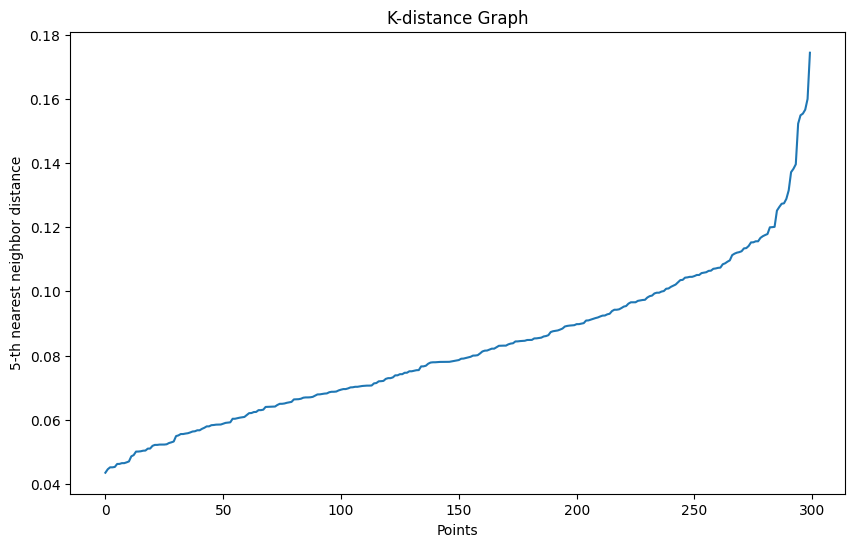

In [126]:
from sklearn.neighbors import NearestNeighbors
def plot_k_distance_graph(X, k):
  neigh = NearestNeighbors(n_neighbors=k)
  neigh.fit(X)
  distances, _ = neigh.kneighbors(X)
  distances = np.sort(distances[:, k-1])
  plt.figure(figsize=(10, 6))
  plt.plot(distances)
  plt.xlabel("Points")
  plt.ylabel(f"{k}-th nearest neighbor distance")
  plt.title("K-distance Graph")


  # Define os limites do eixo Y e cria os ticks de 0.02 em 0.02
  y_min = np.floor(min(distances) * 100) / 100  # Arredonda para baixo (múltiplo de 0.02)
  y_max = np.ceil(max(distances) * 100) / 100   # Arredonda para cima (múltiplo de 0.02)
  yticks = np.arange(y_min, y_max + 0.02, step=0.02)
  plt.yticks(yticks)
  
plot_k_distance_graph(X_moons, k=5)

DBSCAN - Dataset 1 (Moons)


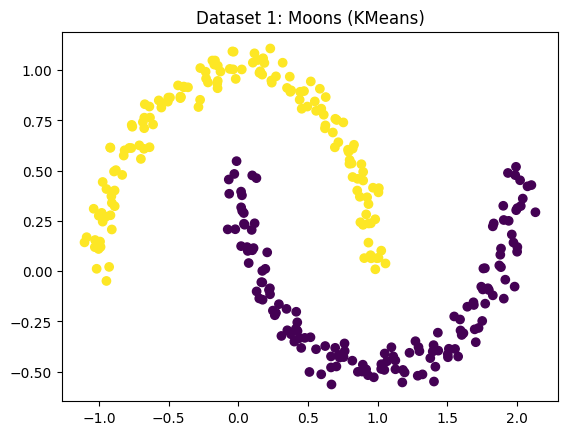

In [123]:
#@title Dataset Moon (DBSCAN)
eps = 0.12 #@param
minPts = 2 #@param
labels_dbscan_moon = cluster_dbscan(X_moons,eps=eps, min_samples=minPts)
print("DBSCAN - Dataset 1 (Moons)")
avaliar_clustering(X_moons, labels_dbscan_moon)

plot_scatter(X_moons, labels_dbscan_moon, "Dataset 1: Moons (KMeans)")

> **Pergunta**: Quais foram os melhores valores de $eps$ e $minPts$, isto é, que retornam o máximo `silhouete score` para cada dataset?

**Resposta**:

Blobs: eps = 1.1, minPts = 2

Moon: eps = 0.12, minPts = 2

### C. Hierárquico aglomerativo

Altere o valor de $num\_cluster$ até descobrir o que maximiza o silhouete score.

Vamos fazer os mesmos tipos de testes que fizemos para os dois algoritmos anteriores

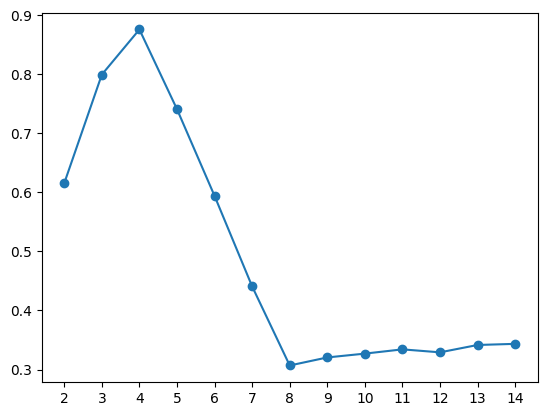

In [131]:
valores_k = []
silho_score = []
for i in range(2, 15):
    agglo_labels = cluster_hierarchical(X_blobs, i)
    score = avaliar_clustering(X_blobs, agglo_labels)

    valores_k.append(i)
    silho_score.append(score)

fig, ax = plt.subplots()
ax.plot(valores_k, silho_score, marker='o')
ax.set_xticks(valores_k)
# ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()

KMeans - Dataset 1 (Blobs)


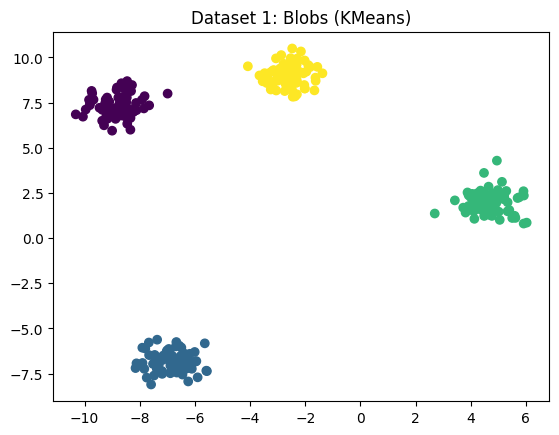

In [132]:
#@title Dataset  Blobs (Hierárquico)
num_cluster = 4 #@param
labels_hier_blob = cluster_hierarchical(X_blobs, n_clusters=num_cluster)
print("KMeans - Dataset 1 (Blobs)")
avaliar_clustering(X_blobs, labels_hier_blob)

plot_scatter(X_blobs, labels_hier_blob, "Dataset 1: Blobs (KMeans)")

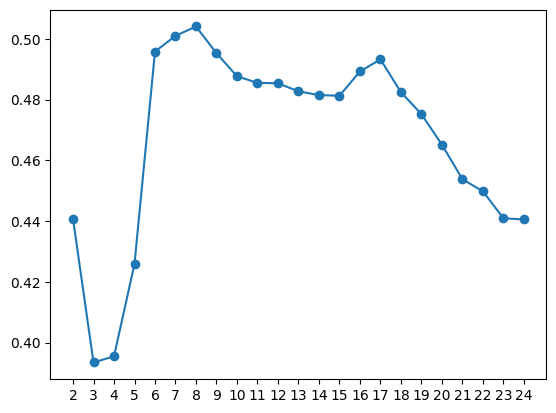

In [139]:
valores_k = []
silho_score = []
for i in range(2, 25):
    agglo_labels = cluster_hierarchical(X_moons, i)
    score = avaliar_clustering(X_moons, agglo_labels)

    valores_k.append(i)
    silho_score.append(score)

fig, ax = plt.subplots()
ax.plot(valores_k, silho_score, marker='o')
ax.set_xticks(valores_k)
# ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()

KMeans - Dataset 1 (Blobs)


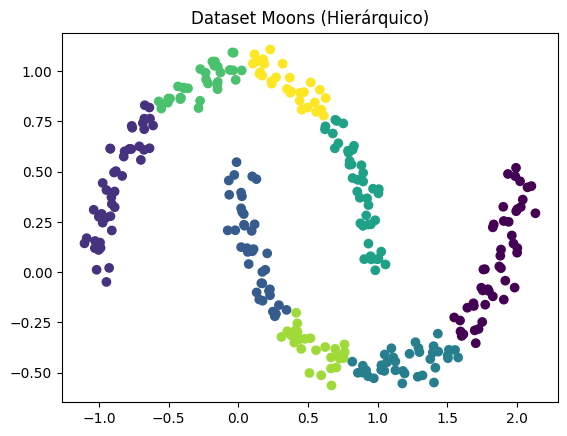

In [140]:
#@title Dataset Moon (Hierárquico)
num_cluster = 8 #@param
labels_hier_moon = cluster_hierarchical(X_moons, n_clusters=num_cluster)
print("KMeans - Dataset 1 (Blobs)")
avaliar_clustering(X_moons, labels_hier_moon)

plot_scatter(X_moons, labels_hier_moon, "Dataset Moons (Hierárquico)")

Ou seja, os melhores valores para o blobs foi 4 e para o moons, 8 (mesmo que isso seja estranho)

# Parte 2. -  Avaliando um dataset com rótulos

**Valor**: 5 pontos

Nesta parte, iremos carregar e avaliar a clusterização do dataset Iris.
O conjunto de dados contém 3 classes de 50 instâncias cada, onde cada classe se refere a um tipo de planta de íris.

In [141]:
from sklearn.datasets import load_iris

# Dataset 3: Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

list(iris.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

## 6. Avaliação com medida externa

Implemente uma funcção que retorne o rand score de um algortimo de clusterização.

Observe que a assinatura da função será semelhante a implementada no exercício anterior.

In [ ]:
from sklearn.metrics import  rand_score
# Faça uma função que receba como parametros:
# O vetor de pontos original, o vetor de grupos pelo algoritmo e os labels verdadeiros
# retorne o silhouete_score da comparação dos vetores.

#Funcao anterior
# def avaliar_clustering_externo(X, labels, true_labels):
def avaliar_clustering_externo(labels, true_labels):
    #Não entendi para que serve o X aqui, dado que ele não entra na função do rand_score
    return adjusted_rand_score(labels, true_labels)


## 7. Compare os KMeans, DBSCAN e Hierárquico

### A. K-Means

Altere o valor de $k$ até descobrir o que maximiza o rand index.

Vamos criar uma função para descobrir o melhor valor de K

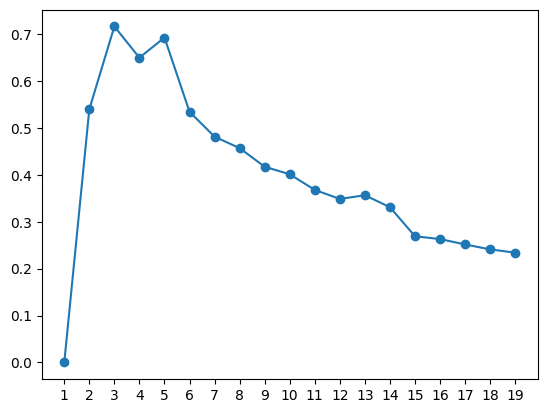

[0.0, 0.5399218294207123, 0.7163421126838476, 0.6498176853819967, 0.692705847366269, 0.534483215802617, 0.4813391903122403, 0.4570179139974683, 0.41731024053119253, 0.4012566669102068, 0.3679268204592765, 0.348641151981581, 0.35655239002195593, 0.3311220785794686, 0.2690882235366655, 0.26308333121251454, 0.2516513235266586, 0.24110904013818624, 0.2340471377707549]


In [176]:
valores_k = []
rand_scores = []
for i in range(1, 20):
    kmeans_labels = cluster_kmeans(X_iris, i)
    score = avaliar_clustering_externo(kmeans_labels, y_iris)

    valores_k.append(i)
    rand_scores.append(score)


fig, ax = plt.subplots()
ax.plot(valores_k, rand_scores, marker='o')
ax.set_xticks(valores_k)
# ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()
print(rand_scores)

KMeans - Dataset 1 (Iris)


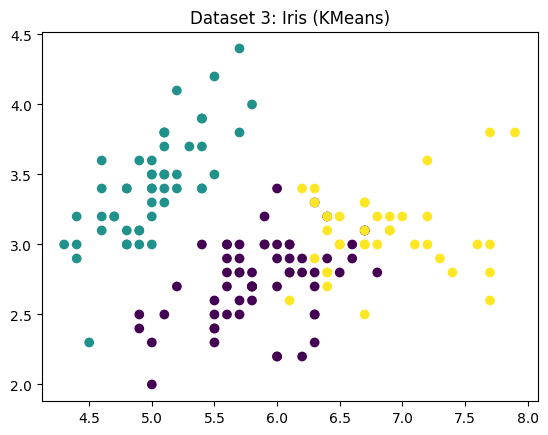

In [175]:
#@title Dataset  Iris (KMeans)
k = 3 #@param
labels_kmeans_iris = cluster_kmeans(X_iris, n_clusters=k)
print("KMeans - Dataset 1 (Iris)")
# avaliar_clustering_externo(X_iris, labels_kmeans_iris, y_iris)

plot_scatter(X_iris, labels_kmeans_iris, "Dataset 3: Iris (KMeans)")

> **Pergunta**: Quais foram os melhores valores de $k$, isto é, que retornam o máximo `rand index`?

**Resposta**:

K=3


### B. DB-SCAN

Altere os valores de $eps$ e $minPts$  até descobrir os que maximizam o silhouete score.

**Dica**: você pode alterar o código abaixo para iterar e testar os valores automaticamente.

**Observação**: Caso os valores dos parâmetro faça o algoritmo encontrar apenas UM cluster,  a função de cálculo do silhouete score irá retornar um erro de tamannho de array pois ela precisa de pelos dois clusters para identificar coesão e separação dos clusters.

Vamos chamar a função que foi criada anteriormente, a "max_dbscan"

In [208]:
#Vamos testar o eps de 0.1, até 10.0, de 0.1 em 0.1
eps_range = np.arange(0.1, 5.0, 0.1)

#Vamos testar a quantidade de samples de 2 até 10
min_samples_range = range(1, 10)

#score, eps, samples
print(max_dbscan(X_iris, eps_range, min_samples_range))

(np.float64(0.6867350732769776), np.float64(0.9), 1)


E também chamar o grafico de cotovelo

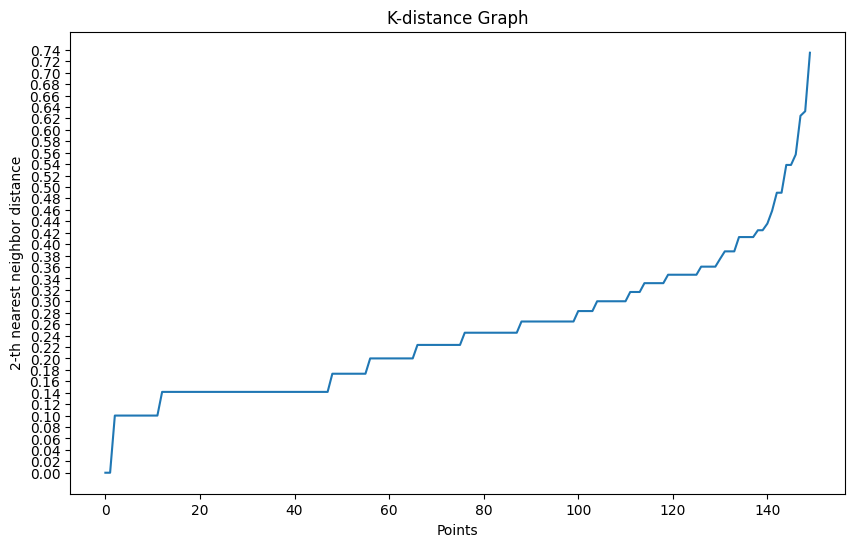

In [201]:
plot_k_distance_graph(X_iris, k=2)

DBSCAN - Dataset 1 (iris)


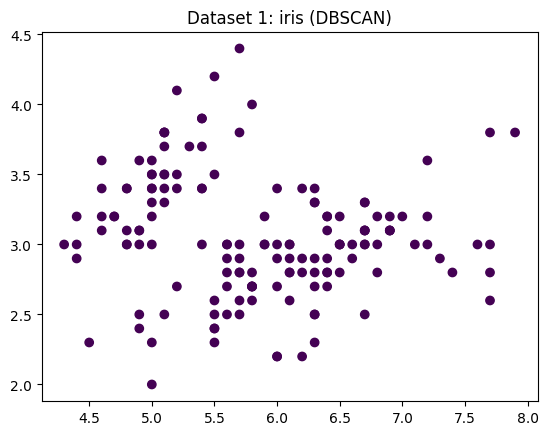

In [210]:
#@title Dataset Iris (DBSCAN)
eps = 0.9 #@param
minPts = 1 #@param
labels_dbscan_iris = cluster_dbscan(X_iris,eps=eps, min_samples=minPts)
print("DBSCAN - Dataset 1 (iris)")
avaliar_clustering_externo(labels_dbscan_iris, y_iris)

plot_scatter(X_iris, labels_dbscan_iris, "Dataset 1: iris (DBSCAN)")

> **Pergunta**: Quais foram os melhores valores de $eps$ e $minPts$, isto é, que retornam o máximo `silhouete score` para cada dataset?

**Resposta**: Mesmo que de forma estranha, através dos testes foi identificado o eps = 0.9 e o minPts = 1


### C. Hierárquico aglomerativo

Altere o valor de $num\_cluster$ até descobrir o que maximiza o rand index.

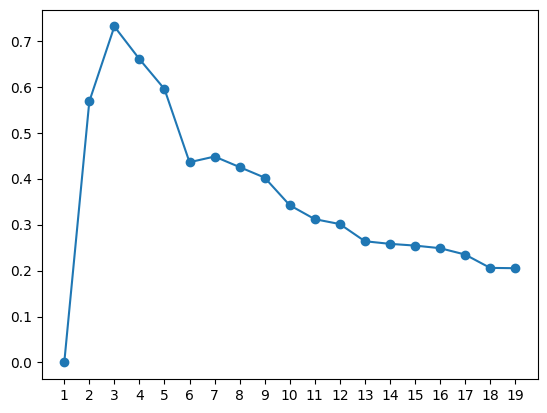

In [216]:
valores_k = []
rand_scores = []
for i in range(1, 20):
    kmeans_labels = cluster_hierarchical(X_iris, i)
    score = avaliar_clustering_externo(kmeans_labels, y_iris)

    valores_k.append(i)
    rand_scores.append(score)


fig, ax = plt.subplots()
ax.plot(valores_k, rand_scores, marker='o')
ax.set_xticks(valores_k)
# ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.show()

KMeans - Dataset 1 (iris)


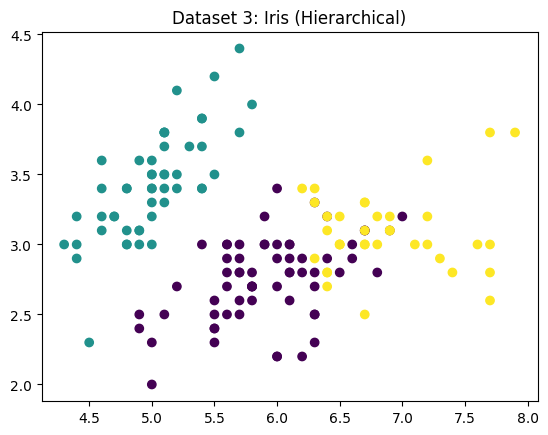

In [214]:
#@title Dataset  Iris (Hierárquico)
num_cluster = 3 #@param
labels_hier_iris = cluster_hierarchical(X_iris, n_clusters=num_cluster)
print("KMeans - Dataset 1 (iris)")
avaliar_clustering_externo(labels_hier_iris, y_iris)

plot_scatter(X_iris, labels_hier_iris, "Dataset 3: Iris (Hierarchical)")

### Visualizando hierárquia entre os pontos com um dendograma.

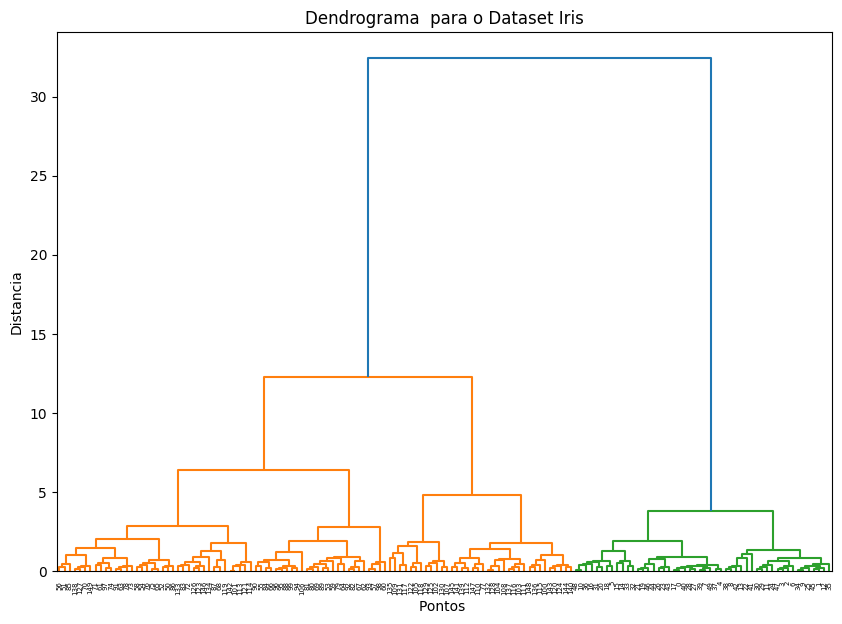

In [215]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_iris, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title("Dendrograma  para o Dataset Iris")
plt.xlabel("Pontos ")
plt.ylabel("Distancia")
plt.show()

#  Parte 3: Discussão sobre os resultados

**Valor**: 5 pontos


Discuta sobre os resultados obtidos até aqui no campo abaixo. A discussão deve conter para qual tipo de dado cada algoritmos funcionou melhor e qual(is) parâmetros influenciaram na qualidade dos clusters.


### KMeans
Para o conjunto de dados Blobs, o kmeans se saiu muito melhor!
Os dados do algoritmo estão bem agrupados o que ajuda o kmeans a definir a distância de cada cluster de forma mais precisa!

Seus principais parâmetros para este conjunto de dados foi k = 4.

Ainda no kmeans, o mesmo se saiu muito bem com o conjunto de dados iris, tendo o k=3.


### DBscan

O dbscan se saiu muito bem tanto no conjunto de dados Blobs quando no de moons, dado que a sua forma de clusterização se baseia em agrupamento por densidade, ou seja, ele se ajusta melhor aos formatos de dados irregulares.

Para o blobs, os melhores parâmetros foram eps=1.1 e min_samples = 2.
Para o moons, os melhores parâmetros foram eps=0.12 e min_samples=2.

### Hierárquico Aglomerativo

Já o hierarquico aglormerativo se saiu muito bem para o conjunto de dados blobs, tendo o num_cluster=4.

Ele também se saiu muito bem para o conjunto de dados iris! Tendo o k=3


